# NDBC data

Download data from National Data Buoy Center (NDBC) https://www.ndbc.noaa.gov/obs.shtml 

This notebook requires package NDBC to run
* https://pypi.org/project/NDBC/ - [Documentation](https://supermanzer.github.io/NDBC/html/index.html)

In [1]:
# !pip install NDBC

In [2]:
from NDBC.NDBC import DataBuoy
import pandas as pd

Define buoy

In [3]:
DB = DataBuoy()
buoy_id='41041'
DB.set_station_id(buoy_id)

In [4]:
# multiple years directly
# DB.get_data(datetime_index=True,years=[2016,2017])
# df = DB.data['stdmet']['data'] 

iterate over years and get data

In [5]:
dfs = []
for year in range(2016, 2023):
    try:
        DB.get_data(datetime_index=True,years=[year]) 
        df_aux = DB.data['stdmet']['data']
        dfs.append(df_aux)
    except:
#         corrupted data
        pass

df = pd.concat(dfs, axis=0)

c:\Users\jem\AppData\Local\mambaforge\lib\site-packages\NDBC\NDBC.py:258: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if isinstance(data.loc[0][0], str) and data.loc[0][0][0] == "#":
c:\Users\jem\AppData\Local\mambaforge\lib\site-packages\NDBC\NDBC.py:262: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  unit_dict = {k: units[i] for i, k in enumerate(columns)}
c:\Users\jem\AppData\Local\mambaforge\lib\site-packages\NDBC\NDBC.py:364: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data_df = pd.read_csv(url, sep=r"\s+")
c:\Us

Get Hm0 and Tp only

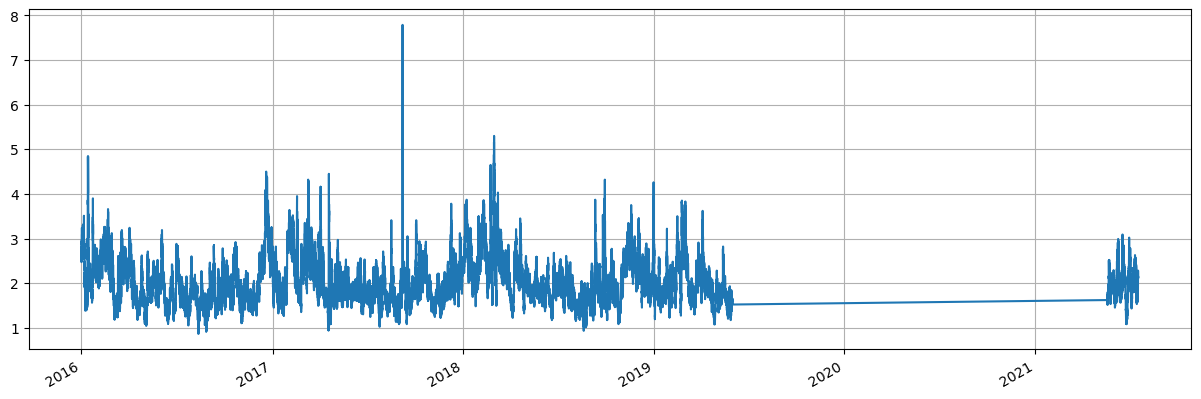

In [6]:
df=df[['WVHT','DPD']]  # Hm0 and Tp
# remove small  Hm0
df=df[df['WVHT']>0.15]
# plot Hm0 to check
df['WVHT'].plot(figsize=(15,5),grid=True);